In [1]:
# Load Packages needed for report
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Used for Confusion Matrix
from sklearn import metrics

# Introduction 

We are using a data set from kaggle (https://www.kaggle.com/mdabbert/ultimate-ufc-dataset) to predict who will win the fight based off the predictor variables available in the data set.

In [2]:
# Reading data 
data = pd.read_csv("ufc-master.csv")
data.head()

R_fighter         B_fighter  R_odds  B_odds       R_ev  \
0  Deiveson Figueiredo  Joseph Benavidez    -225     180  44.444444   
1      Jack Hermansson   Kelvin Gastelum    -112    -112  89.285714   
2        Marc Diakiese     Rafael Fiziev    -167     135  59.880240   
3        Ariane Lipski    Luana Carolina    -125     100  80.000000   
4    Alexandre Pantoja     Askar Askarov    -210     165  47.619048   

         B_ev       date                                    location  \
0  180.000000  7/18/2020  Abu Dhabi, Abu Dhabi, United Arab Emirates   
1   89.285714  7/18/2020  Abu Dhabi, Abu Dhabi, United Arab Emirates   
2  135.000000  7/18/2020  Abu Dhabi, Abu Dhabi, United Arab Emirates   
3  100.000000  7/18/2020  Abu Dhabi, Abu Dhabi, United Arab Emirates   
4  165.000000  7/18/2020  Abu Dhabi, Abu Dhabi, United Arab Emirates   

                country Winner  ...  B_Featherweight_rank B_Bantamweight_rank  \
0  United Arab Emirates    Red  ...                   NaN                 NaN   
1  United Arab Emirates    Red  ...                   NaN                 NaN   
2  United Arab Emirates   Blue  ...                   NaN                 NaN   
3  United Arab Emirates    Red  ...                   NaN                 NaN   
4  United Arab Emirates   Blue  ...                   NaN                 NaN   

  B_Flyweight_rank  B_Pound-for-Pound_rank  better_rank  finish  \
0              2.0                     NaN          Red     SUB   
1              NaN                     NaN          Red     SUB   
2              NaN                     NaN      neither   U-DEC   
3              NaN                     NaN      neither     SUB   
4              NaN                     NaN      neither   U-DEC   

     finish_details  finish_round  finish_round_time  total_fight_time_secs  
0  Rear Naked Choke           1.0               4:48                  288.0  
1         Heel Hook           1.0               1:18                   78.0  
2               NaN           3.0               5:00                  900.0  
3           Kneebar           1.0               1:28                   88.0  
4               NaN           3.0               5:00                  900.0  

[5 rows x 113 columns]

# Exploratory Data Analysis (EDA)

1. Feature Selection
2. Data Visualization


### Feature Selection
Part of the EDA process is selecting features that are strong predictors of our Target Variable. We will include feature selection before implementing our ML models.

In [3]:
# Dropping columns the include NA
ufc_cut = pd.DataFrame.dropna(data, axis = 1, how = "any")

# Our original data set had 113 columns, but now you can see our 'ufc_cut' data set has 70 columns
ufc_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4292 non-null   object 
 1   B_fighter                     4292 non-null   object 
 2   R_odds                        4292 non-null   int64  
 3   B_odds                        4292 non-null   int64  
 4   R_ev                          4292 non-null   float64
 5   B_ev                          4292 non-null   float64
 6   date                          4292 non-null   object 
 7   location                      4292 non-null   object 
 8   country                       4292 non-null   object 
 9   Winner                        4292 non-null   object 
 10  title_bout                    4292 non-null   bool   
 11  weight_class                  4292 non-null   object 
 12  gender                        4292 non-null   object 
 13  no_

In [5]:
ufc_cut = ufc_cut[ufc_cut.B_Reach_cms != 0]

In [6]:
# Creating Target variable column
ufc_cut["Target"] = np.where(ufc_cut["Winner"].str.contains("Red"), 1, 0)

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = ufc_cut.corr()

<Figure size 864x720 with 0 Axes>

In [8]:
#Correlation with output variable
cor_target = abs(cor["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

R_odds     0.333623
B_odds     0.337662
R_ev       0.313217
B_ev       0.312062
R_age      0.107537
B_age      0.105494
age_dif    0.157110
Target     1.000000
Name: Target, dtype: float64

The above shows which columns have the strongest correlation the the Target Column

##  Data Visualization

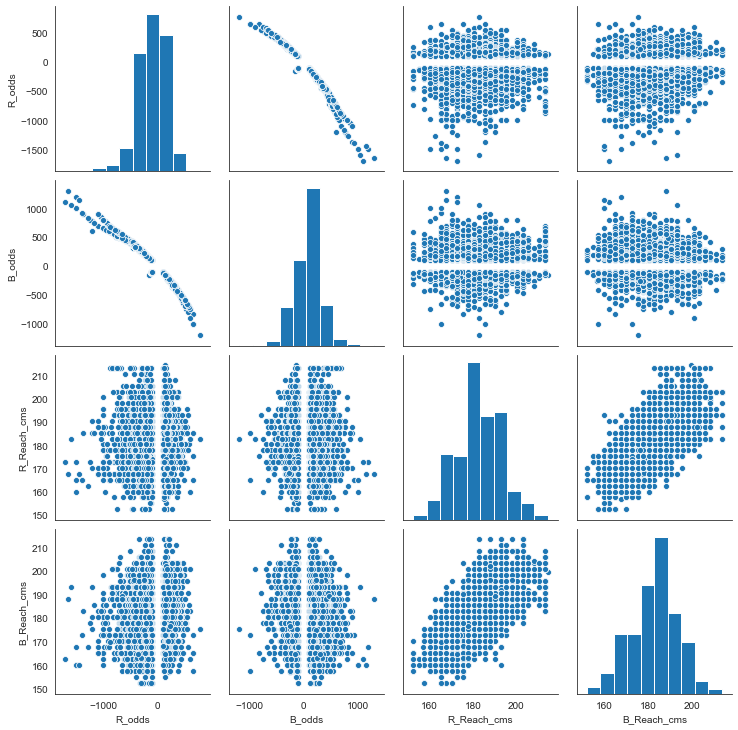

In [16]:
sns.set_style("white")
sns.pairplot(ufc_cut[['R_odds', 'B_odds', 'R_Reach_cms', 'B_Reach_cms']])

From the pairplot above you can see that "....."

# Modelling
We are implementing both Logistic Regression and Random Forest models to make a predictions on the UFC data set.

## Model Selection

#### Logistic Regression
Logistic regression is commonly used machine learning algorithm because it's highly interpretable, doesn't require too much computational power and doesn't need its input features to be scaled. Another advantage is that logistic regression is a classification model which outputs probabilities. This is an advantage because you can compare the outputs of two instances and determine which one is predicted to be closer to your target class. One thing to look out for when implementing logistic regression is that it cannot solve non-linear problems.

#### Random Forest
Random forest is a supervised learning algorithm that randomly creates and merges multiple decision trees into one “forest.” The goal is not to rely on a single learning model, but rather a collection of decision models to improve accuracy. The primary difference between this approach and the standard decision tree algorithms is that the root nodes feature splitting nodes are generated randomly.

In [9]:
# Create Classifiers
lr = LogisticRegression()

In [10]:
# Our 2 X columns 
ufc_cut_feat = ufc_cut[['R_odds', 'age_dif']]

# Our Y column
ufc_cut_targ = ufc_cut['Winner']

In [11]:
# Creating Training and Test set
seed = 50  # so that the result is reproducible
x_train, x_test, y_train, y_test = train_test_split(ufc_cut_feat, ufc_cut_targ , test_size = 0.2, random_state = seed)

In [12]:
# Fitting our Logistic Regression Model
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Make predictions on test data
predictions = lr.predict(x_test)

In [14]:
# Use score method to get accuracy of model
score = lr.score(x_test, y_test)
print(score)

0.6623981373690337


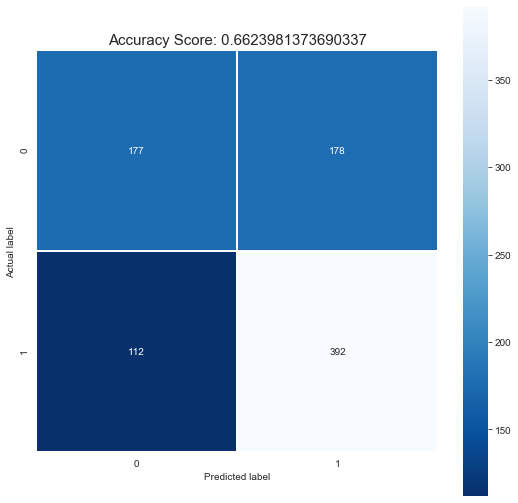

In [15]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Model Results

### Accuracy (all correct / all)
###### Logistic Regression
177 + 392 = 569
177 + 392 + 178 + 112 = 869
569 / 869 = 63.79%

###### Random Forest


### Sensitivity (true positives / all actual positives)
###### Logistic Regression
177 / 177 + 112 = 61.25%

###### Random Forest


### Specificity (true negatives / all actual negatives)
###### Logistic Regression
392 / (392 + 178) = 68.77%

###### Random Forest




# Results Discussion